For this exercise I will analyze a dataset containing information about meteorite landings in earth.
The dataset contains information on whether these meteorites were found and coordinates of where they could be found.
*   We will see when most meteorites reached earth.

*   We will focus on the type of meteorites that reached the earth.
*  we will identify the classes of the meteorites with the biggest masses that entered earth.


In [9]:
#Craft a Story from NASA Meteorite Landing dataset
# Audience: Non-Technical

# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Set styles
sns.set(style="whitegrid")

In [10]:
#Load the data
file_path = '/content/Meteor Landing Data.csv'
df = pd.read_csv(file_path)

# Quick look at data
df.head()

,Name,ID,NameType,Recclass,Mass(g),Fall,Year,Reclat,Reclong,GeoLocation
0,Northwest Africa 7701,57150,Valid,CK6,55.0,Found,2101.0,0.00000,0.00000,"(0.0, 0.0)"
1,Chelyabinsk,57165,Valid,LL5,100000.0,Fell,2013.0,54.81667,61.11667,"(54.81667, 61.11667)"
2,Northwest Africa 7863,57427,Valid,LL5,1000.0,Found,2013.0,0.00000,0.00000,"(0.0, 0.0)"
3,Northwest Africa 7855,57420,Valid,H4,916.0,Found,2013.0,0.00000,0.00000,"(0.0, 0.0)"
4,Northwest Africa 7861,57425,Valid,L5,611.0,Found,2013.0,0.00000,0.00000,"(0.0, 0.0)"


In [12]:

# 3. Data Cleaning & Preparation

# Check for missing values
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         45716 non-null  object 
 1   ID           45716 non-null  int64  
 2   NameType     45716 non-null  object 
 3   Recclass     45716 non-null  object 
 4   Mass(g)      45585 non-null  float64
 5   Fall         45716 non-null  object 
 6   Year         45425 non-null  float64
 7   Reclat       38401 non-null  float64
 8   Reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


,0
Name,0
ID,0
NameType,0
Recclass,0
Mass(g),131
Fall,0
Year,291
Reclat,7315
Reclong,7315
GeoLocation,7315


In [33]:
df[['mass(g)', 'year', 'recclass', 'reclong']].describe()

,mass(g),year,reclong
count,3.811500e+04,38115.000000,38115.000000
mean,1.560071e+04,1989.993913,61.309359
std,6.286817e+05,25.469892,80.777583
min,0.000000e+00,860.000000,-165.433330
25%,6.630000e+00,1986.000000,0.000000
50%,2.909000e+01,1996.000000,35.666670
75%,1.872900e+02,2002.000000,157.166670
max,6.000000e+07,2101.000000,178.200000


In [32]:
# Drop rows with missing values
df.dropna(inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Confirm cleanup
df.info()

# Simplify column names if necessary
#df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
df.columns = [col.strip().lower().replace(" ", "_").replace("-", "_") for col in df.columns]

# Print data after cleaning
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38115 entries, 0 to 38114
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         38115 non-null  object 
 1   id           38115 non-null  int64  
 2   nametype     38115 non-null  object 
 3   recclass     38115 non-null  object 
 4   mass(g)      38115 non-null  float64
 5   fall         38115 non-null  object 
 6   year         38115 non-null  float64
 7   reclat       38115 non-null  float64
 8   reclong      38115 non-null  float64
 9   geolocation  38115 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.9+ MB


,name,id,nametype,recclass,mass(g),fall,year,reclat,reclong,geolocation
0,Northwest Africa 7701,57150,Valid,CK6,55.0,Found,2101.0,0.00000,0.00000,"(0.0, 0.0)"
1,Chelyabinsk,57165,Valid,LL5,100000.0,Fell,2013.0,54.81667,61.11667,"(54.81667, 61.11667)"
2,Northwest Africa 7863,57427,Valid,LL5,1000.0,Found,2013.0,0.00000,0.00000,"(0.0, 0.0)"
3,Northwest Africa 7855,57420,Valid,H4,916.0,Found,2013.0,0.00000,0.00000,"(0.0, 0.0)"
4,Northwest Africa 7861,57425,Valid,L5,611.0,Found,2013.0,0.00000,0.00000,"(0.0, 0.0)"


In [31]:
#Identifying when most meteorites reached earth and were found.
pd.crosstab(df_clean['year'] ,df_clean['fall']).sort_values( by= 'Found', ascending = False).head(10)

fall,Fell,Found
year,,
1979.0,2,3042
1988.0,6,2289
1998.0,9,2138
2003.0,9,1744
2006.0,5,1609
1999.0,7,1585
1997.0,3,1502
2000.0,3,1499
1990.0,7,1499


From this chart we can see that 1979 has the most meteorites found, which summed up to be 3042. This can also be vizualized in the chart below.

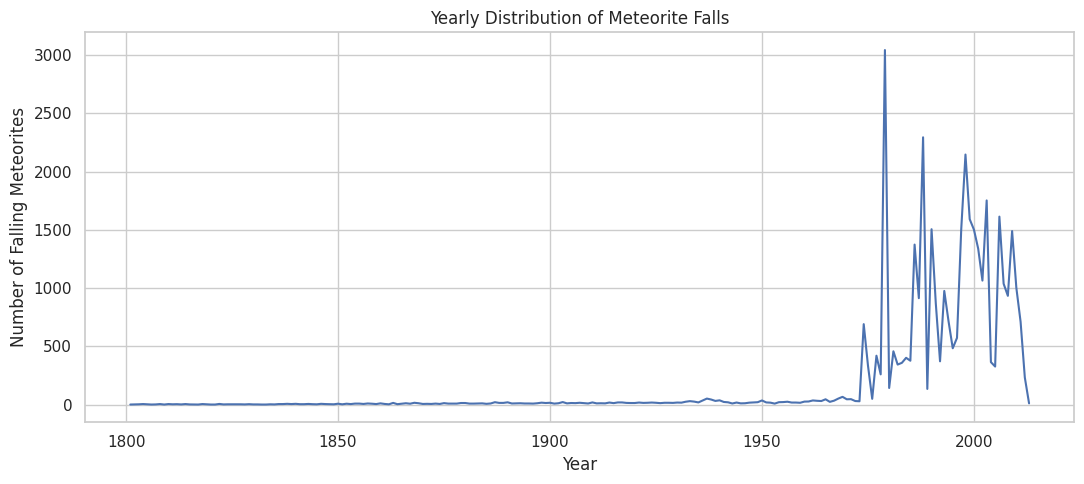

In [26]:
df_filtered = df_clean[(df_clean['year'] >= 1800) & (df_clean['year'] <= 2025)]

# Number of falling meteorites
meteor_by_year = df_filtered['year'].value_counts().sort_index()

plt.figure(figsize=(11, 5))
sns.lineplot(x=meteor_by_year.index, y=meteor_by_year.values)
plt.title('Yearly Distribution of Meteorite Falls')
plt.xlabel('Year')
plt.ylabel('Number of Falling Meteorites')
plt.grid(True)
plt.tight_layout()
plt.show()

What is the biggest meteorite to be found?

In [35]:
df_clean[['name', 'mass(g)', 'year', 'fall']].sort_values(by='mass(g)', ascending=False).head(5)

,name,mass(g),year,fall
37108,Hoba,60000000.0,1920.0,Found
38020,Cape York,58200000.0,1818.0,Found
38110,Campo del Cielo,50000000.0,1575.0,Found
37504,Canyon Diablo,30000000.0,1891.0,Found
37423,Armanty,28000000.0,1898.0,Found


We can see that the biggest meteorite by the name Hoba fell ad was found in 1920



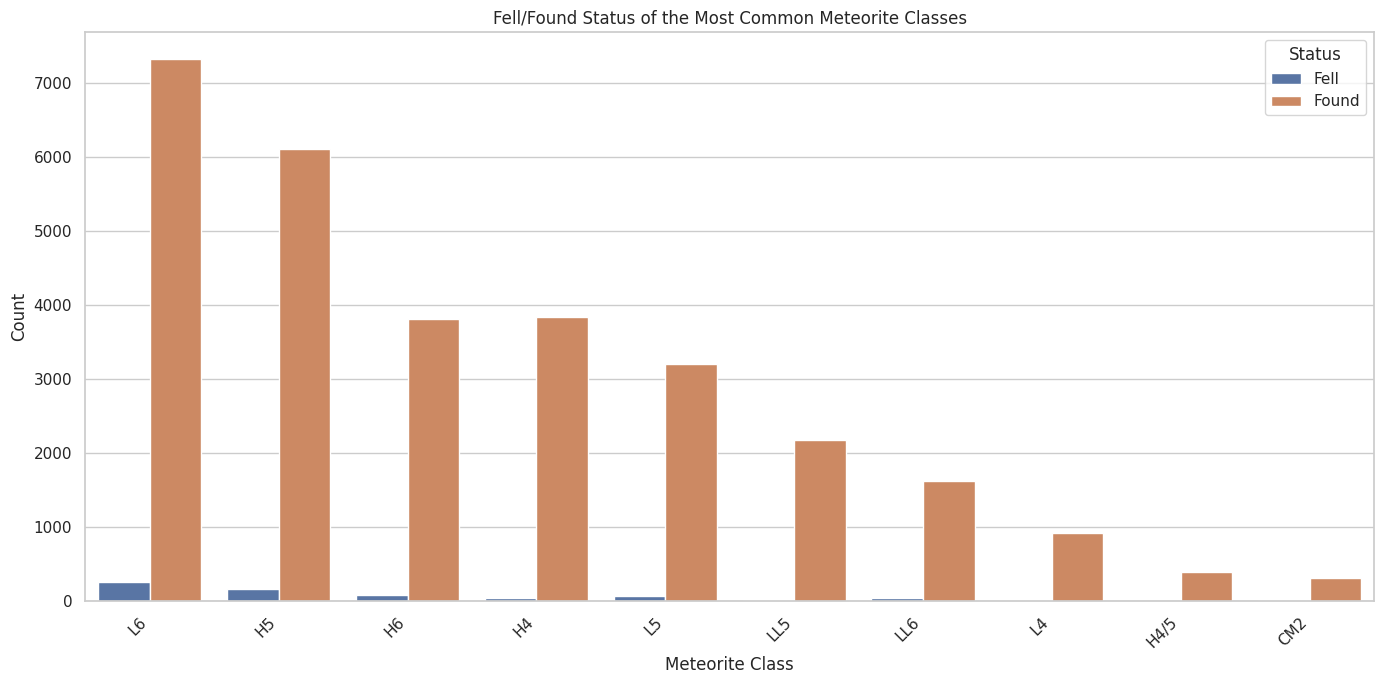

In [27]:
#Question 2: Class of meteorites that reached Earth

top_10_recclasses = df_clean['recclass'].value_counts().head(10).index
df_top_10 = df_clean[df_clean['recclass'].isin(top_10_recclasses)]

plt.figure(figsize=(14, 7))
sns.countplot(data=df_top_10, x='recclass', hue='fall', order=top_10_recclasses)
plt.title('Fell/Found Status of the Most Common Meteorite Classes')
plt.xlabel('Meteorite Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

We can see in the chart above that L6 is the class of meteorites that can be found the most in this dataset.

In [28]:
pd.crosstab(df_clean['recclass'], df_clean['fall'], normalize='index').head(10)

fall,Fell,Found
recclass,,
Acapulcoite,0.027027,0.972973
Acapulcoite/Lodranite,0.000000,1.000000
Acapulcoite/lodranite,0.000000,1.000000
Achondrite-prim,0.000000,1.000000
Achondrite-ung,0.027778,0.972222
Angrite,0.100000,0.900000
Aubrite,0.169811,0.830189
Aubrite-an,0.000000,1.000000
Brachinite,0.000000,1.000000


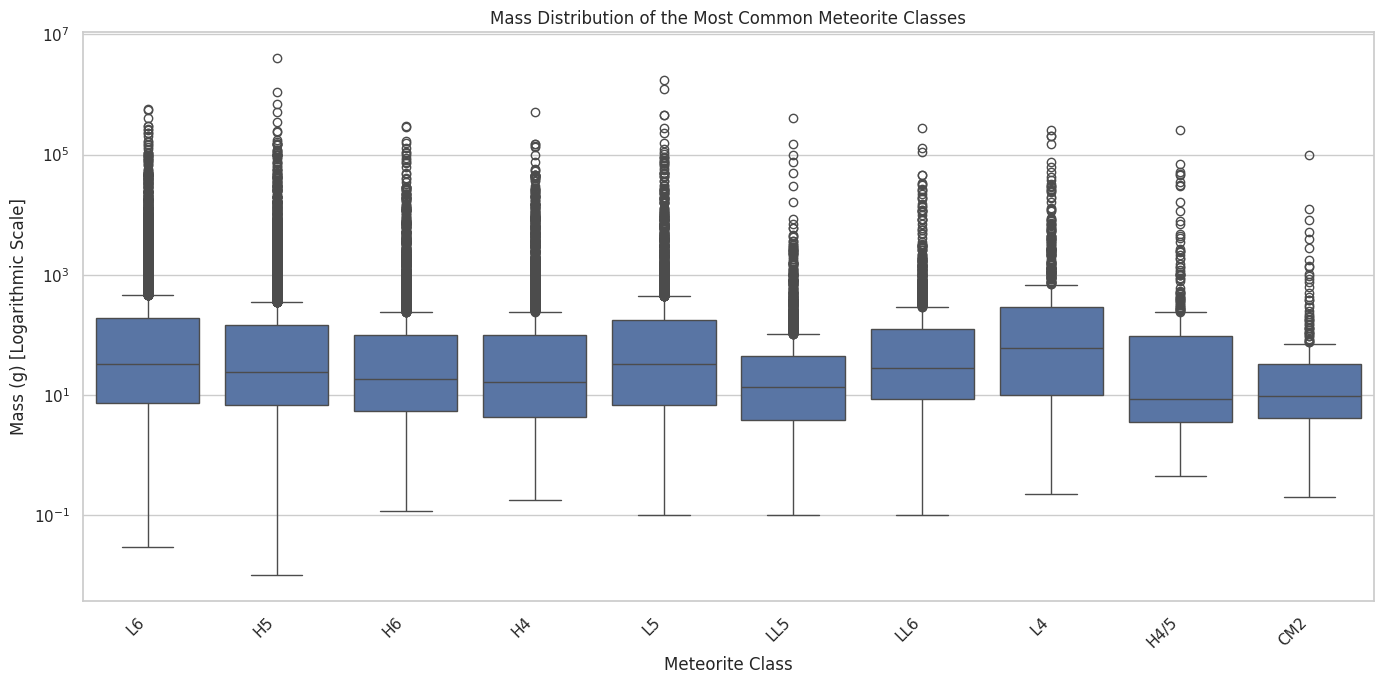

In [30]:
#Question 3: distribution of the most common meteorite classes by mass
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_top_10, x='recclass', y='mass(g)', order=top_10_recclasses)
plt.yscale('log') # logarithmic scale
plt.title('Mass Distribution of the Most Common Meteorite Classes')
plt.xlabel('Meteorite Class')
plt.ylabel('Mass (g) [Logarithmic Scale]')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The meteorite class that appears to have the largest mass on the chart is H4/5.



Conclusion and Summary

After analyzing the data we found that 1979 was the year when most meteorites were found according to out data set.

 We also learned that L6 is the class of meteorites that can be found the most in this dataset meaning they are the most abundant in earth.

Lastly, we saw that the meteorite class that appears to have the largest mass are H4/5.